In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
default_data = pd.read_csv('data/default.csv')

In [3]:
display(default_data.head(3))

print('Shape:', default_data.shape)
print('Contains Missing Values:', default_data.isna().any().any())

print('\n{0}'.format(default_data['default'].value_counts()))
print('\n{0}'.format(default_data['student'].value_counts()))
print('\n{0}'.format(default_data.iloc[:, 2:].describe()))

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


Shape: (10000, 4)
Contains Missing Values: False

No     9667
Yes     333
Name: default, dtype: int64

No     7056
Yes    2944
Name: student, dtype: int64

            balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495


The value counts for 'default' indicate that the classes are imbalanced. 

In [4]:
label_encoder = LabelEncoder()
default_data['default'] = label_encoder.fit_transform(default_data['default'])
default_data['student'] = label_encoder.fit_transform(default_data['student'])
default_data.head(3)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947


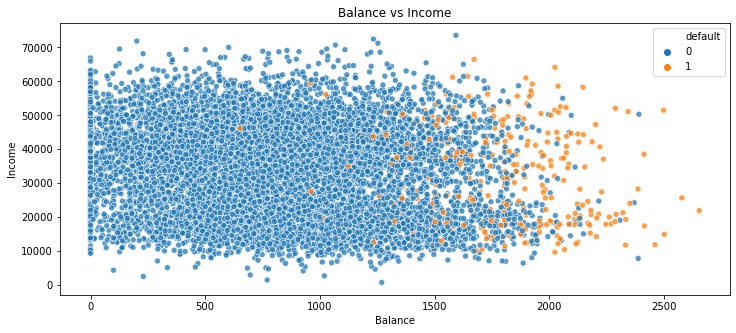

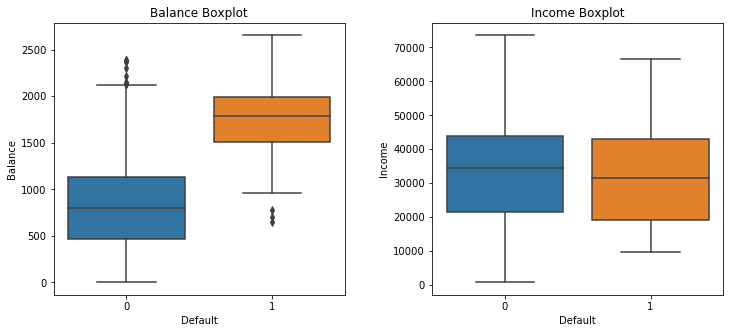

In [5]:
plt.figure(figsize=(12, 5))
default_scatterplot = sns.scatterplot(
    data=default_data,
    x='balance',
    y='income',
    hue='default',
    alpha=0.75
)
default_scatterplot.set(
    title='Balance vs Income', 
    xlabel='Balance', 
    ylabel='Income'
)

fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
balance_boxplot = sns.boxplot(
    x='default', 
    y='balance', 
    data=default_data, 
    ax=axes[0]
)
balance_boxplot.set(
    title='Balance Boxplot', 
    xlabel='Default', 
    ylabel='Balance'
)

income_boxplot = sns.boxplot(
    x='default', 
    y='income', 
    data=default_data, 
    ax=axes[1]
)
income_boxplot.set(
    title='Income Boxplot', 
    xlabel='Default', 
    ylabel='Income'
)
plt.subplots_adjust(wspace=0.3)
plt.show()

In [6]:
X = default_data.iloc[:, 1:].to_numpy()
y = default_data['default'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [7]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_probabilities = classifier.predict_proba(X_test)

y_null = np.zeros_like(y_pred)

accuracy = accuracy_score(y_test, y_pred)
null_accuracy = accuracy_score(y_test, y_null)
c = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred).round(3)
precision = precision_score(y_test, y_pred).round(3)
recall = recall_score(y_test, y_pred).round(3)

print('Accuracy:', accuracy)
print('Null Accuracy:{0}\n'.format(null_accuracy))
print('Confusion Matrix:\n{0}\n'.format(c))
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:',  recall)

Accuracy: 0.9655
Null Accuracy:0.9665

Confusion Matrix:
[[1916   17]
 [  52   15]]

F1 Score: 0.303
Precision: 0.469
Recall: 0.224


Accuracy is not a good metric for assessing the logistic regression model due to class imbalance.
This is supported by the null accuracy in addition to the low recall. The low recall indicates a relatively high number of false negatives / Type II error.